In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 13}

matplotlib.rc('font', **font)


plt.style.use('dark_background')

%matplotlib widget

def limit(AF, g, powLim, E_dark):
    p = powLim/g
    V = np.sqrt(p*50)
    E = AF * V /np.sqrt(1/3)
    return E / E_dark

In [225]:
benData_df  = pd.read_csv('benQmeasData.csv')
compowerAF  = pd.read_csv('10m Compower AF-Table 1.csv')
comsolAF    = pd.read_csv('COMSOL_AF_movedipole_hepcatposter_2022_20logEoverV.csv')
powerLimAF  = pd.read_csv('run1p4_powerLimit.csv')
powerLimAF.head()

,Freq(MHz),Power (1e-14W)
0,44.984927,0.511592
1,47.256098,0.470124
2,49.928062,0.457286
3,52.600027,0.481515
4,55.271992,0.502904


1.9163361767446266e-13


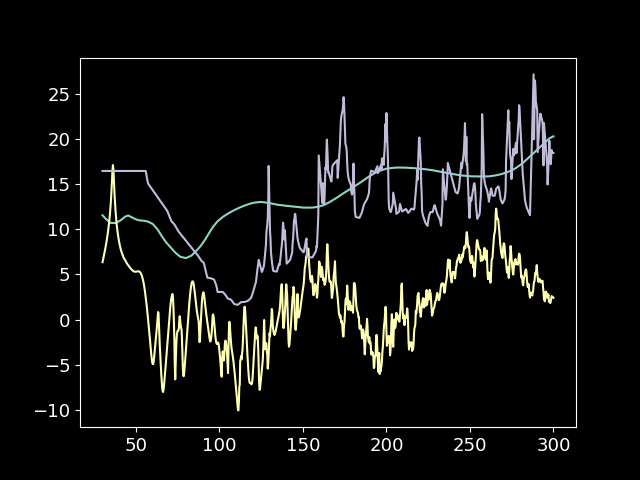

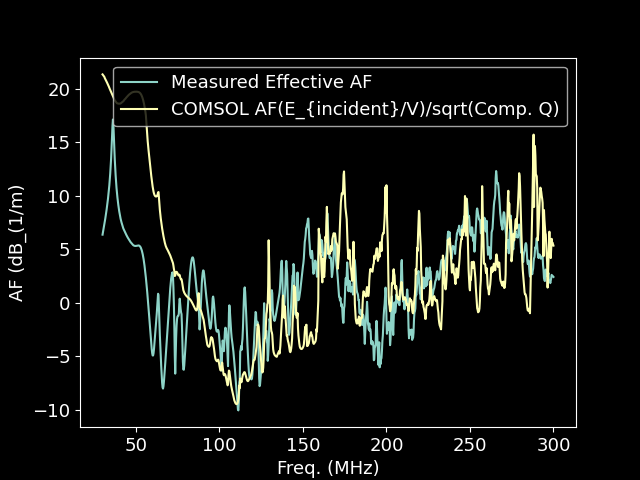

In [226]:

numPoints   = 1000
freqs       = np.linspace(30,300,numPoints)
gain        = 10**(73.7/10)

QLin_interp     = np.interp(freqs, benData_df['Frequency (MHz)'], benData_df['QVal (linear)'])
compAF_interp   = np.interp(freqs, benData_df['Frequency (MHz)'], benData_df['Composite AF (m^-1)'])
effAF_interp    = np.interp(freqs, benData_df['Frequency (MHz)'], benData_df['Effective AF (dBm^-1)'])
biconAF_interp  = np.interp(freqs, compowerAF['Freq., MHz'], compowerAF['Manufacturer, ComPower'])
comsolAF_interp = np.interp(freqs, comsolAF['Freq(MHz)'], comsolAF['AF(20log(E/V)'])
powerLim_interp= np.interp(freqs, powerLimAF['Freq(MHz)'], powerLimAF['Power (1e-14W)'])

plt.close('all')
plt.plot(freqs, (biconAF_interp))
plt.plot(freqs, effAF_interp)
plt.plot(freqs, comsolAF_interp)

plt.figure()
plt.plot(freqs, effAF_interp, label = 'Measured Effective AF')
plt.plot(freqs, comsolAF_interp - 10*np.log10(np.sqrt(QLin_interp)), label = 'COMSOL AF(E_{incident}/V)/sqrt(Comp. Q)')
plt.xlabel('Freq. (MHz)')
plt.ylabel('AF (dB_(1/m)')
plt.legend()

print(limit(5, 
    gain,
    0.25e-14,
    3300))


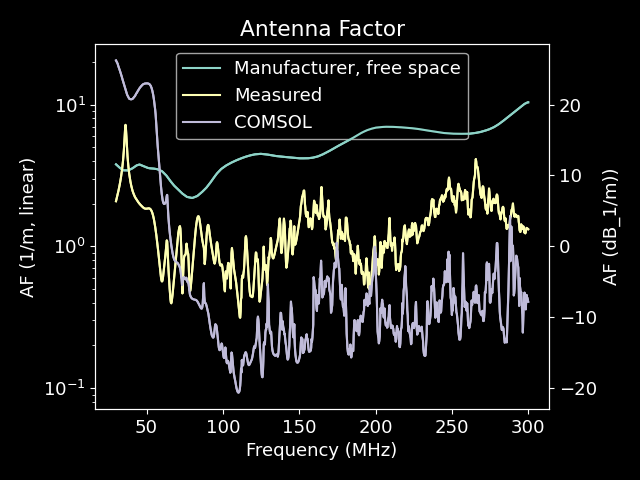

In [227]:
plt.close('all')
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.plot(freqs, 10**(biconAF_interp/20), label = 'Manufacturer, free space')
ax1.plot(freqs, 10**(effAF_interp/20), label = 'Measured')
ax1.plot(freqs, 10**(comsolAF_interp/20) / (np.sqrt(QLin_interp)) , label = 'COMSOL')
ax1.set_ylabel('AF (1/m, linear)')
ax1.legend(loc='upper center')


ax2 = ax1.twinx()
ax2.plot(freqs,biconAF_interp, label = 'Manufacturer (free space)')
ax2.plot(freqs, effAF_interp, label = 'Measured')
ax2.plot(freqs, 20*np.log10(10**(comsolAF_interp/20) / (np.sqrt(QLin_interp))) , label = 'COMSOL')

ax1.semilogy()

ax2.set_ylabel('AF (dB_1/m))')

plt.title('Antenna Factor')
ax1.set_xlabel('Frequency (MHz)')
fig.tight_layout()


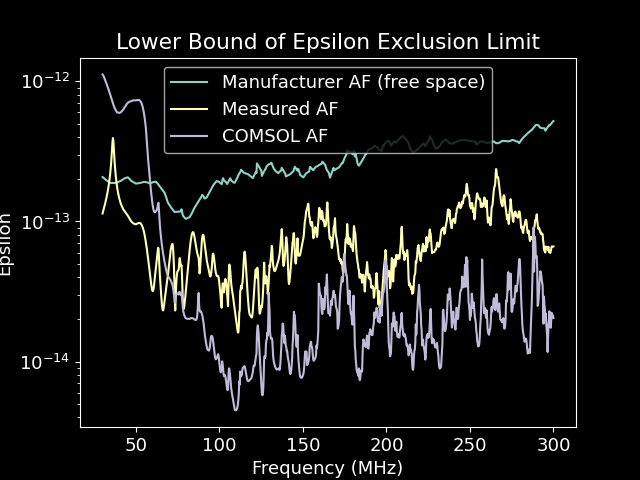

In [222]:
plt.close('all')
plt.figure()
plt.semilogy()

#plt.plot(freqs, limit(10**(biconAF_interp/20), gain, .25e-14, 3300))
#plt.plot(freqs, limit(10**(effAF_interp/20), gain, .25e-14, 3300))
#plt.plot(freqs, limit(10**(comsolAF_interp/20), gain, .25e-14, 3300))

plt.title('Lower Bound of Epsilon Exclusion Limit')
plt.plot(freqs, limit(10**(biconAF_interp/20), gain, powerLim_interp/1e14, 3300), label = 'Manufacturer AF (free space)')
plt.plot(freqs, limit(10**(effAF_interp/20),gain, powerLim_interp/1e14, 3300), label = 'Measured AF')
plt.plot(freqs, limit(10**(comsolAF_interp/20) / (np.sqrt(QLin_interp)), gain, powerLim_interp/1e14, 3300),label = 'COMSOL AF')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Epsilon')
plt.legend(loc = 'upper center')

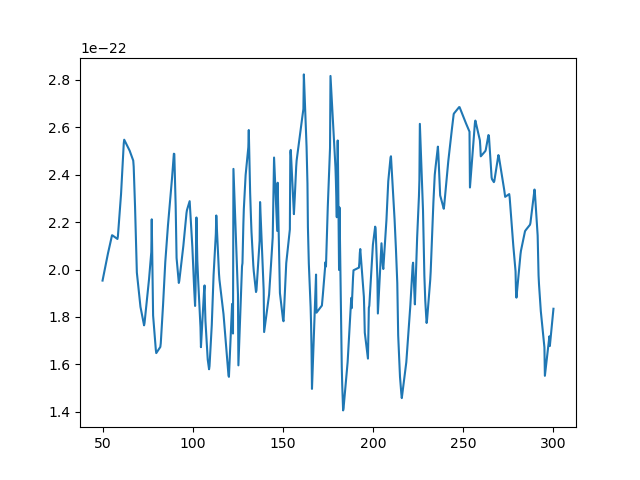

In [115]:
#sanity check on power limit
#agrees with qual run 1.2 data (0.4 zW)
plt.close('all')
plt.figure()
plt.plot(freqs, powerLim_interp/1e14/gain)